In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn import preprocessing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
df=pd.read_csv('dataset_falcon9.csv')

In [61]:
df.drop(['BoosterVersion','Date','Longitude','Latitude'],axis=1,inplace = True)

In [62]:
df.columns

Index(['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome',
       'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
       'ReusedCount', 'Serial', 'Class'],
      dtype='object')

In [63]:
df.shape

(90, 14)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     bool   
 7   Reused        90 non-null     bool   
 8   Legs          90 non-null     bool   
 9   LandingPad    64 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


In [65]:
df[['GridFins','Reused','Legs']]=df[['GridFins','Reused','Legs']].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     int32  
 7   Reused        90 non-null     int32  
 8   Legs          90 non-null     int32  
 9   LandingPad    64 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 8.9+ KB


In [67]:
df['LandingPad'].value_counts()

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [68]:
df['LandingPad']=df['LandingPad'].replace(np.nan,'WeDontKnow')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     int32  
 7   Reused        90 non-null     int32  
 8   Legs          90 non-null     int32  
 9   LandingPad    90 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 8.9+ KB


In [70]:
df['LandingPad'].value_counts()

LandingPad
5e9e3032383ecb6bb234e7ca    35
WeDontKnow                  26
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [71]:
df.isnull().sum()

FlightNumber    0
PayloadMass     0
Orbit           0
LaunchSite      0
Outcome         0
Flights         0
GridFins        0
Reused          0
Legs            0
LandingPad      0
Block           0
ReusedCount     0
Serial          0
Class           0
dtype: int64

In [72]:
df_dummy=pd.get_dummies(df[['Orbit','LaunchSite','Outcome','LandingPad','Serial']])

In [73]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Orbit_ES-L1                          90 non-null     bool 
 1   Orbit_GEO                            90 non-null     bool 
 2   Orbit_GTO                            90 non-null     bool 
 3   Orbit_HEO                            90 non-null     bool 
 4   Orbit_ISS                            90 non-null     bool 
 5   Orbit_LEO                            90 non-null     bool 
 6   Orbit_MEO                            90 non-null     bool 
 7   Orbit_PO                             90 non-null     bool 
 8   Orbit_SO                             90 non-null     bool 
 9   Orbit_SSO                            90 non-null     bool 
 10  Orbit_VLEO                           90 non-null     bool 
 11  LaunchSite_CCAFS SLC 40              90 non-null     bool 
 

In [74]:
df_dummy = df_dummy.astype(int)

In [75]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Orbit_ES-L1                          90 non-null     int32
 1   Orbit_GEO                            90 non-null     int32
 2   Orbit_GTO                            90 non-null     int32
 3   Orbit_HEO                            90 non-null     int32
 4   Orbit_ISS                            90 non-null     int32
 5   Orbit_LEO                            90 non-null     int32
 6   Orbit_MEO                            90 non-null     int32
 7   Orbit_PO                             90 non-null     int32
 8   Orbit_SO                             90 non-null     int32
 9   Orbit_SSO                            90 non-null     int32
 10  Orbit_VLEO                           90 non-null     int32
 11  LaunchSite_CCAFS SLC 40              90 non-null     int32
 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     int32  
 7   Reused        90 non-null     int32  
 8   Legs          90 non-null     int32  
 9   LandingPad    90 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 8.9+ KB


In [77]:
df.drop(['Orbit','LaunchSite','Outcome','LandingPad','Serial'],axis = 1 , inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Flights       90 non-null     int64  
 3   GridFins      90 non-null     int32  
 4   Reused        90 non-null     int32  
 5   Legs          90 non-null     int32  
 6   Block         90 non-null     float64
 7   ReusedCount   90 non-null     int64  
 8   Class         90 non-null     int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 5.4 KB


In [79]:
df=pd.concat([df,df_dummy],axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 90 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int32  
 4   Reused                               90 non-null     int32  
 5   Legs                                 90 non-null     int32  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int32  
 10  Orbit_GEO                            90 non-null     int32  
 11  Orbit_GTO                         

In [81]:
df.to_csv('preprocessed_Dataset2.csv')

In [82]:
X=df.drop('Class',axis=1)
y=df['Class']

In [83]:
X['PayloadMass'].mean()

6104.959411764707

In [84]:
X['PayloadMass'].std()

4694.671719712727

In [85]:
X['Flights'].mean()

1.788888888888889

In [86]:
X['Flights'].std()

1.2131715741866367

In [87]:
transform=preprocessing.StandardScaler()

In [89]:
X_scaled = transform.fit_transform(X)

In [90]:
type(X_scaled)

numpy.ndarray

In [91]:
col=X.columns
X=pd.DataFrame(X_scaled,columns=col)

In [92]:
type(X)

pandas.core.frame.DataFrame

In [93]:
X['PayloadMass'].mean()

-1.4186183092432555e-16

In [94]:
X['PayloadMass'].std()

1.0056022847309865

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [96]:
lr=LogisticRegression()
params={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
lr_CV=GridSearchCV(lr,params,cv=4)
lr_CV.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [98]:
print("Best params are: " , lr_CV.best_params_)

Best params are:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [99]:
print("Best score is: " , lr_CV.best_score_)

Best score is:  0.8427083333333334


In [100]:
lr_CV.score(X_test,y_test)

0.8888888888888888

In [118]:
accuracy = []
methods = []

In [119]:
accuracy.append(lr_CV.score(X_test,y_test))

In [103]:
accuracy

[0.8888888888888888]

In [120]:
methods.append('Logistic Regression')

In [105]:
methods

['Logistic Regression']

In [107]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm,annot = True, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land','landed'])
    ax.yaxis.set_ticklabels(['did not land','landed'])

In [108]:
y_hat = lr_CV.predict(X_test)

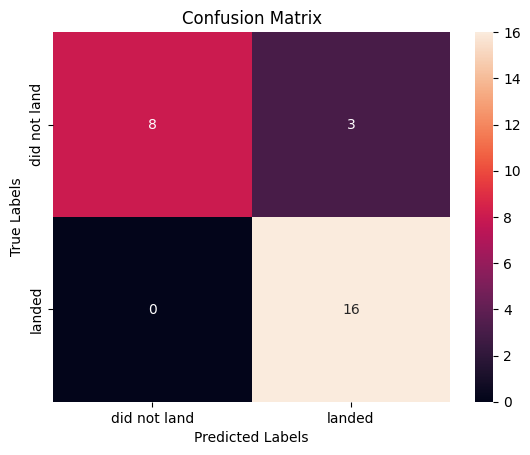

In [109]:
plot_confusion_matrix(y_test,y_hat)

In [110]:
svm = SVC()
params = {'kernel':('linear','rbf','poly','sigmoid'),'C':(0.5,1.0,1.5)}
svm_CV=GridSearchCV(svm,params,cv=10)
svm_CV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1.0, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [111]:
print("Best params are: " , svm_CV.best_params_)
print("Best score is: " , svm_CV.best_score_)

Best params are:  {'C': 1.5, 'kernel': 'sigmoid'}
Best score is:  0.9357142857142857


In [112]:
svm_CV.score(X_test,y_test)

0.9259259259259259

In [121]:
accuracy.append(svm_CV.score(X_test,y_test))
methods.append('Support Vector Machine')

In [122]:
accuracy

[0.8888888888888888, 0.9259259259259259]

In [123]:
methods

['Logistic Regression', 'Support Vector Machine']

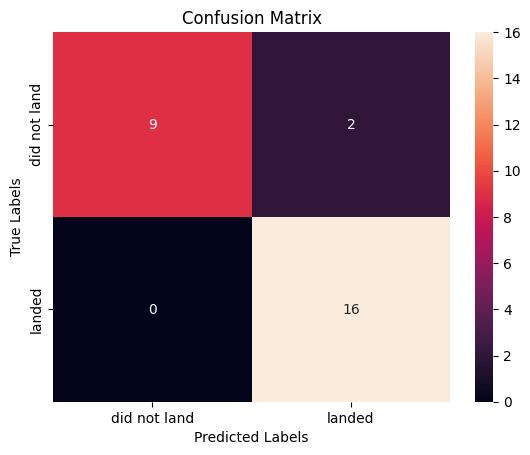

In [124]:
y_hat = svm_CV.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [127]:
tree = DecisionTreeClassifier()

In [184]:
params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':[2*n for n in range(1,10)],          
          'min_samples_leaf':[1,2,4],
          'min_samples_split':[2,5,10]}

In [185]:
tree_CV = GridSearchCV(tree,params,cv = 10)

In [186]:
tree_CV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [187]:
print("Best params are: " , tree_CV.best_params_)
print("Best score is: " , tree_CV.best_score_)

Best params are:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best score is:  1.0


In [188]:
tree_CV.score(X_test,y_test)

1.0

In [189]:
accuracy.append(tree_CV.score(X_test,y_test))
methods.append('Decision Tree')

In [190]:
accuracy

[0.8888888888888888, 0.9259259259259259, 1.0]

In [191]:
methods

['Logistic Regression', 'Support Vector Machine', 'Decision Tree']

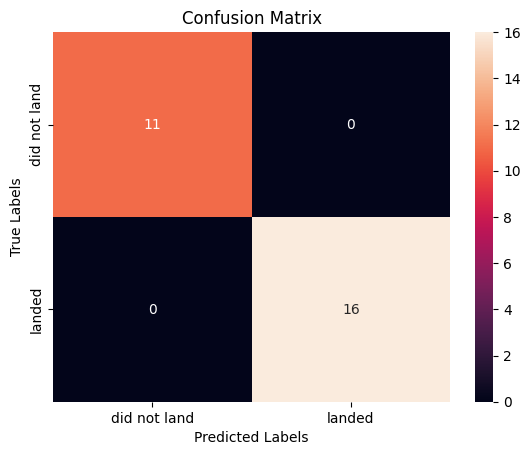

In [192]:
y_hat = tree_CV.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [193]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}
knn_CV=GridSearchCV(knn,params,cv=10)
knn_CV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [194]:
print("Best params are: " , knn_CV.best_params_)
print("Best score is: " , knn_CV.best_score_)

Best params are:  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Best score is:  0.8928571428571429


In [195]:
knn_CV.score(X_test,y_test)

0.8888888888888888

In [196]:
accuracy.append(knn_CV.score(X_test,y_test))
methods.append('K-Nearest Neighbors')

In [197]:
accuracy

[0.8888888888888888, 0.9259259259259259, 1.0, 0.8888888888888888]

In [198]:
methods

['Logistic Regression',
 'Support Vector Machine',
 'Decision Tree',
 'K-Nearest Neighbors']

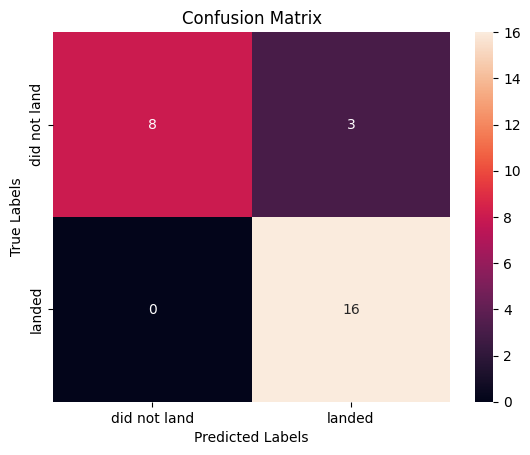

In [199]:
y_hat = knn_CV.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [219]:
fig = plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

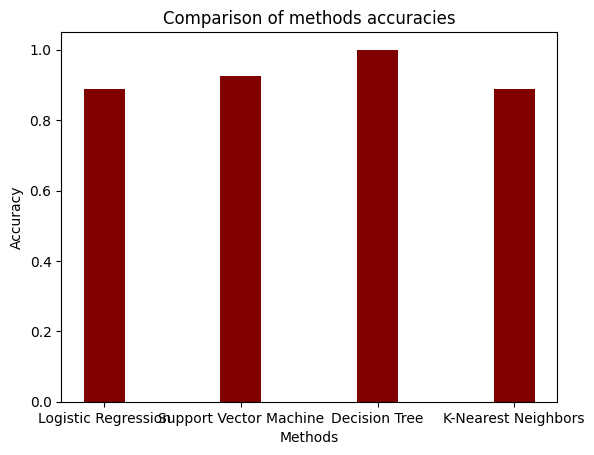

In [220]:
plt.bar(methods,accuracy,color='maroon',width=0.3)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of methods accuracies')
plt.show()

In [221]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'ROC for KNN Method')

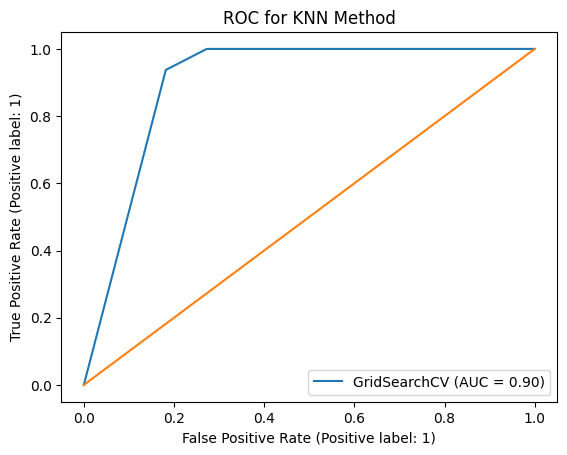

In [225]:
RocCurveDisplay.from_estimator(knn_CV,X_test,y_test)
plt.plot([0,1],[0,1])
plt.title('ROC for KNN Method')

<Axes: xlabel='Class', ylabel='count'>

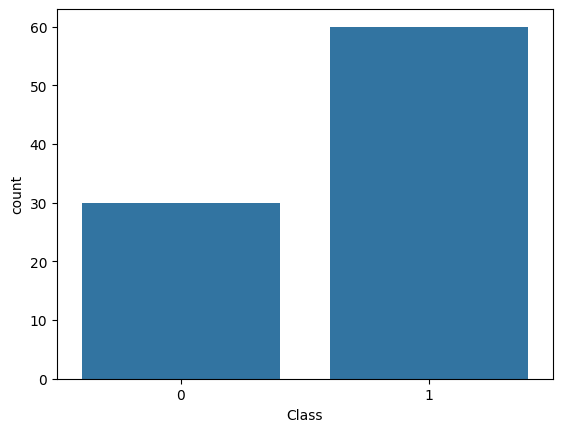

In [227]:
sns.countplot(x='Class',data=df)